In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score,precision_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler


In [270]:
titan = sns.load_dataset('titanic')
titan

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [271]:
titan.shape

(891, 15)

In [272]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [273]:
titan.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [274]:
titan.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [275]:
titan.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# null_values and treatment

In [276]:
titan.age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

In [277]:
titan['age'].median()

28.0

In [278]:
titan['age'] = titan['age'].fillna(titan['age'].median())
titan['age'].isnull().sum()

0

In [279]:
titan['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [280]:
titan['embarked'].mode()

0    S
Name: embarked, dtype: object

In [281]:
titan['embarked'] = titan['embarked'].fillna('S')
print('null values : ',titan['embarked'].isnull().sum())
print(titan['embarked'].value_counts())

null values :  0
S    646
C    168
Q     77
Name: embarked, dtype: int64


In [282]:
titan['embark_town'].mode()

0    Southampton
Name: embark_town, dtype: object

In [283]:
titan['embark_town'] = titan['embark_town'].fillna('Southampton')
print('null values : ',titan['embark_town'].isnull().sum())
print(titan['embark_town'].value_counts())

null values :  0
Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64


In [284]:
titan['deck'].mode()

0    C
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [285]:
titan['deck'] = titan['deck'].fillna('C')
print('null values : ',titan['deck'].isnull().sum())
print(titan['deck'].value_counts())

null values :  0
C    747
B     47
D     33
E     32
A     15
F     13
G      4
Name: deck, dtype: int64


In [286]:
titan.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [287]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [288]:
titan.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

# data analysis

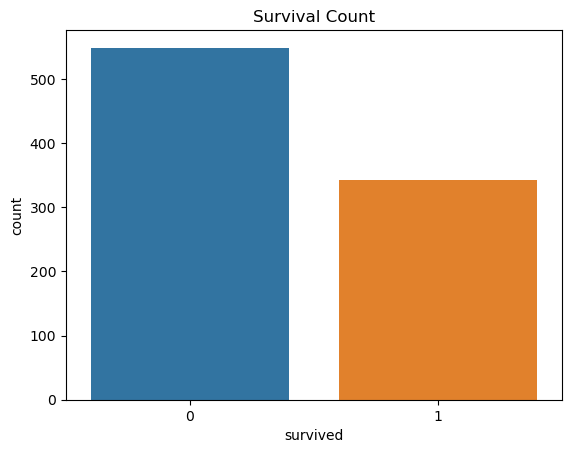

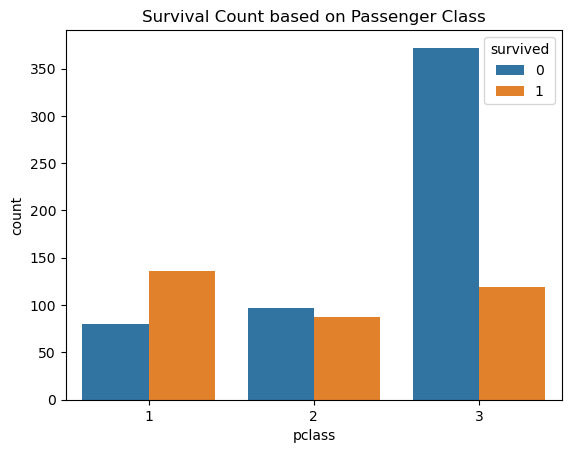

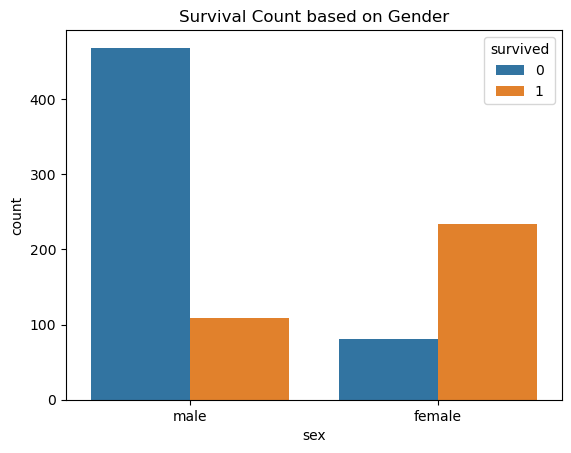

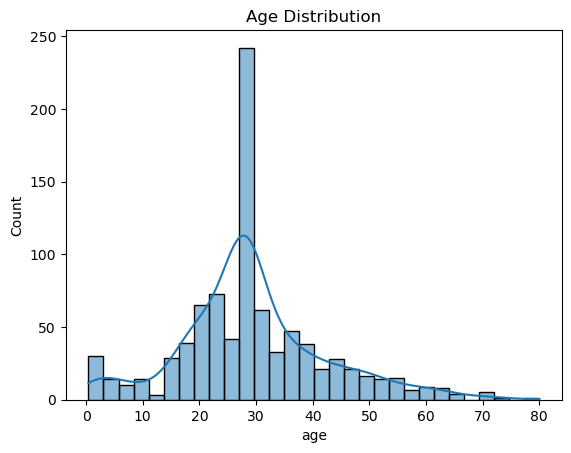

In [289]:
# Plot survival count
sns.countplot(x='survived', data=titan)
plt.title('Survival Count')
plt.show()

# Plot survival count based on passenger class (pclass)
sns.countplot(x='pclass', hue='survived', data=titan)
plt.title('Survival Count based on Passenger Class')
plt.show()

# Plot survival count based on gender (sex)
sns.countplot(x='sex', hue='survived', data=titan)
plt.title('Survival Count based on Gender')
plt.show()

# Plot age distribution of passengers
sns.histplot(titan['age'], kde=True)
plt.title('Age Distribution')
plt.show()

In [290]:
# Create a new feature for family size
titan['family_size'] = titan['sibsp'] + titan['parch'] + 1
titan['family_size'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family_size, dtype: int64

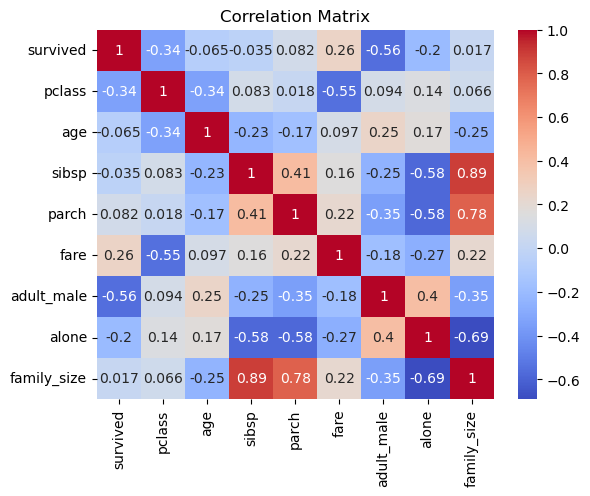

In [291]:
correlation_matrix = titan.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


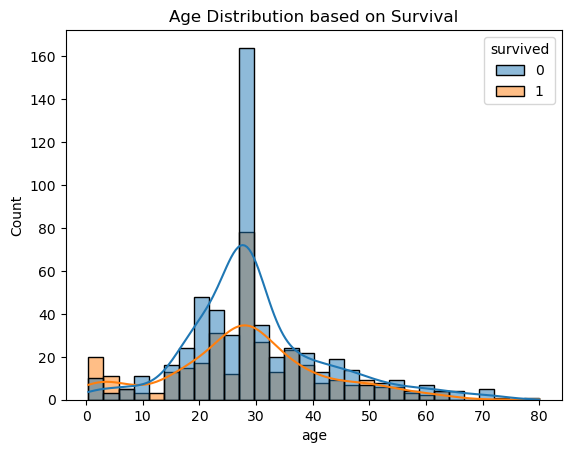

Average Age of Survivors: 28.29
Average Age of Non-Survivors: 30.03


In [292]:
# Plot age distribution based on survival
sns.histplot(data=titan, x='age', hue='survived', kde=True)
plt.title('Age Distribution based on Survival')
plt.show()

# Calculate the average age of survivors and non-survivors
average_age_survived = titan[titan['survived'] == 1]['age'].mean()
average_age_not_survived = titan[titan['survived'] == 0]['age'].mean()
print(f"Average Age of Survivors: {average_age_survived:.2f}")
print(f"Average Age of Non-Survivors: {average_age_not_survived:.2f}")


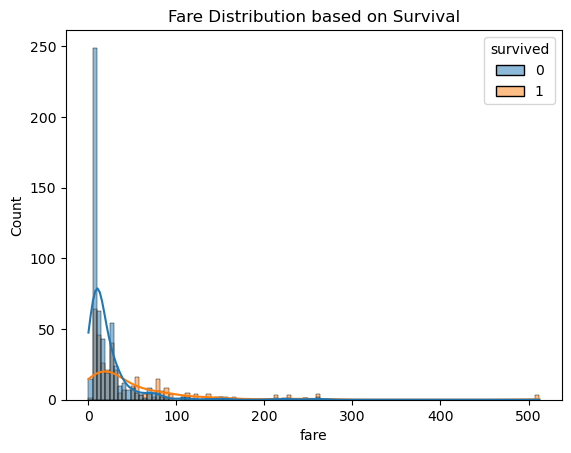

Average Fare of Survivors: 48.40
Average Fare of Non-Survivors: 22.12


In [293]:
# Plot fare distribution based on survival
sns.histplot(data=titan, x='fare', hue='survived', kde=True)
plt.title('Fare Distribution based on Survival')
plt.show()

# Calculate the average fare of survivors and non-survivors
average_fare_survived = titan[titan['survived'] == 1]['fare'].mean()
average_fare_not_survived = titan[titan['survived'] == 0]['fare'].mean()
print(f"Average Fare of Survivors: {average_fare_survived:.2f}")
print(f"Average Fare of Non-Survivors: {average_fare_not_survived:.2f}")


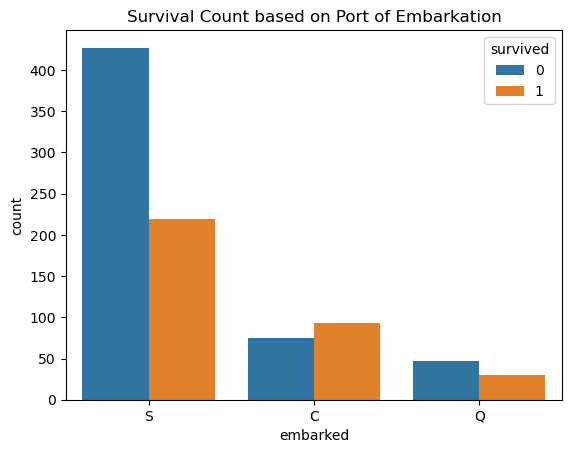

In [294]:
# Plot survival count based on the port of embarkation (embarked)
sns.countplot(x='embarked', hue='survived', data=titan)
plt.title('Survival Count based on Port of Embarkation')
plt.show()


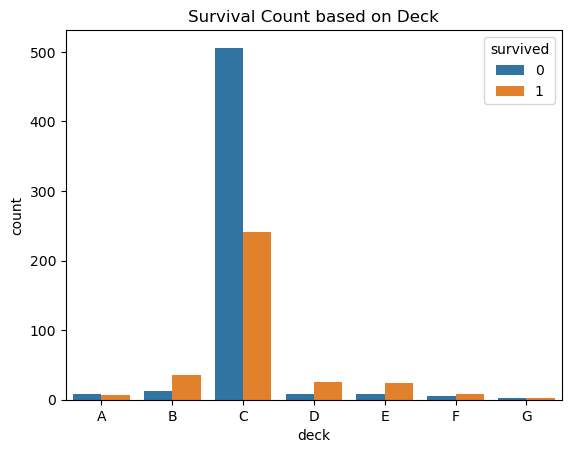

In [295]:
# Plot survival count based on the deck (deck)
sns.countplot(x='deck', hue='survived', data=titan)
plt.title('Survival Count based on Deck')
plt.show()


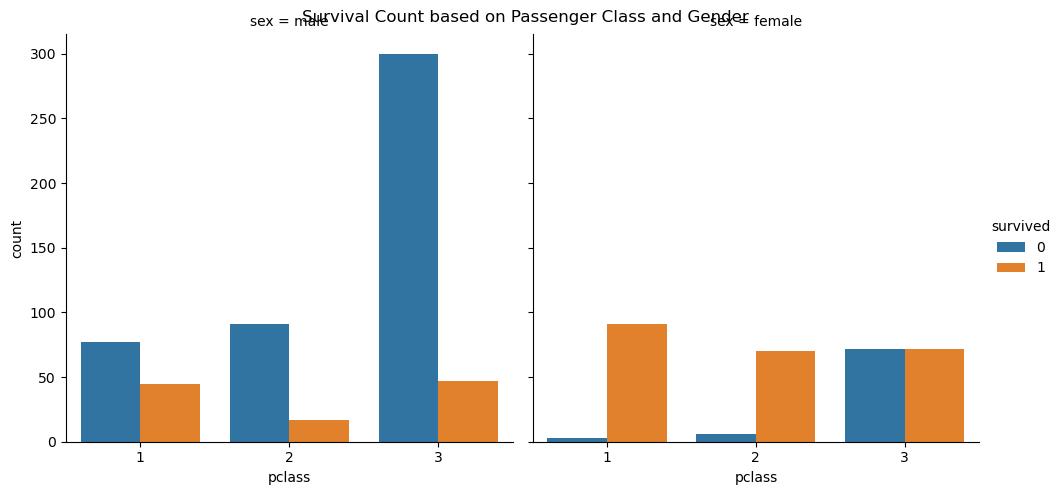

In [296]:
# Plot survival count based on passenger class and gender
sns.catplot(x='pclass', hue='survived', col='sex', data=titan, kind='count')
plt.suptitle('Survival Count based on Passenger Class and Gender')
plt.show()


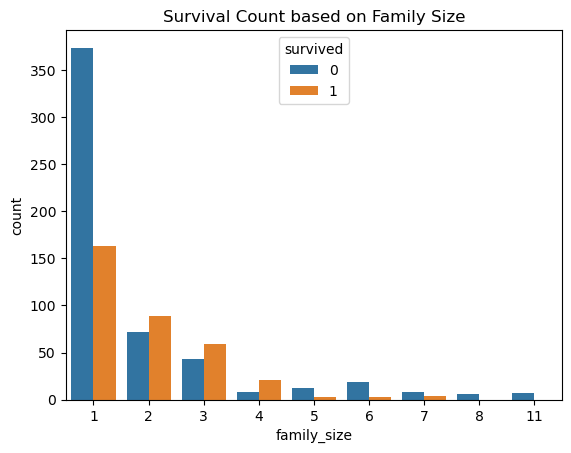

In [297]:
# Plot survival count based on family size
sns.countplot(x='family_size', hue='survived', data=titan)
plt.title('Survival Count based on Family Size')
plt.show()


# statictical analysis

In [298]:
# Cross-tabulation of survival and passenger class
ctab = pd.crosstab(titan['survived'], titan['pclass'])
print(ctab)

# Chi-square test for passenger class and survival
from scipy.stats import chi2_contingency
chi2, p_val, dof, expected = chi2_contingency(ctab)
print(f"Chi-square test statistic: {chi2}")
print(f"P-value: {p_val}")


pclass      1   2    3
survived              
0          80  97  372
1         136  87  119
Chi-square test statistic: 102.88898875696056
P-value: 4.549251711298793e-23


In [299]:
from scipy.stats import ttest_ind

# Separate age values for survivors and non-survivors
age_survived = titan[titan['survived'] == 1]['age']
age_not_survived = titan[titan['survived'] == 0]['age']

# Perform t-test
t_stat, p_value = ttest_ind(age_survived, age_not_survived, nan_policy='omit')

print(f"T-Test Result: t_stat = {t_stat}, p_value = {p_value}")


T-Test Result: t_stat = -1.9394659179476366, p_value = 0.0527606884758555


In [300]:
from scipy.stats import chi2_contingency

# Cross-tabulation of survival and passenger class
ctab = pd.crosstab(titan['survived'], titan['pclass'])

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(ctab)

print(f"Chi-Square Test Result: chi2 = {chi2}, p_value = {p_value}")


Chi-Square Test Result: chi2 = 102.88898875696056, p_value = 4.549251711298793e-23


In [301]:
from scipy.stats import f_oneway

# Separate fare values for each passenger class
fare_class1 = titan[titan['pclass'] == 1]['fare']
fare_class2 = titan[titan['pclass'] == 2]['fare']
fare_class3 = titan[titan['pclass'] == 3]['fare']

# Perform ANOVA
f_stat, p_value = f_oneway(fare_class1, fare_class2, fare_class3)

print(f"ANOVA Result: F-statistic = {f_stat}, p_value = {p_value}")


ANOVA Result: F-statistic = 242.34415651744814, p_value = 1.0313763209141171e-84


In [302]:
# Cross-tabulation of survival and embarked town
ctab_embarked = pd.crosstab(titan['survived'], titan['embark_town'])

# Perform chi-square test
chi2_embarked, p_value_embarked, dof_embarked, expected_embarked = chi2_contingency(ctab_embarked)

print(f"Chi-Square Test Result for Embarked Town: chi2 = {chi2_embarked}, p_value = {p_value_embarked}")


Chi-Square Test Result for Embarked Town: chi2 = 25.964452881874784, p_value = 2.3008626481449577e-06


# encoding 

In [303]:
titan.select_dtypes(include=('object','category'))

,sex,embarked,class,who,deck,embark_town,alive
0,male,S,Third,man,C,Southampton,no
1,female,C,First,woman,C,Cherbourg,yes
2,female,S,Third,woman,C,Southampton,yes
3,female,S,First,woman,C,Southampton,yes
4,male,S,Third,man,C,Southampton,no
...,...,...,...,...,...,...,...
886,male,S,Second,man,C,Southampton,no
887,female,S,First,woman,B,Southampton,yes
888,female,S,Third,woman,C,Southampton,no
889,male,C,First,man,C,Cherbourg,yes


In [304]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = titan
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
df['sex'] = label_encoder.fit_transform(df['sex'])
df['embarked'] = label_encoder.fit_transform(df['embarked'])
df['who'] = label_encoder.fit_transform(df['who'])
df['embark_town'] = label_encoder.fit_transform(df['embark_town'])
df['alive'] = label_encoder.fit_transform(df['alive'])
df['class'] = label_encoder.fit_transform(df['class'])
df['deck'] = label_encoder.fit_transform(df['deck'])

# Display the DataFrame with encoded variables and original variables dropped
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,2,0,False,2
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,2,0,1,False,2
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,2,1,True,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,2,1,False,2
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,2,0,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,1,1,True,2,2,0,True,1
887,1,1,0,19.0,0,0,30.0000,2,0,2,False,1,2,1,True,1
888,0,3,0,28.0,1,2,23.4500,2,2,2,False,2,2,0,False,4
889,1,1,1,26.0,0,0,30.0000,0,0,1,True,2,0,1,True,1


In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int32  
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    int32  
 8   class        891 non-null    int32  
 9   who          891 non-null    int32  
 10  adult_male   891 non-null    bool   
 11  deck         891 non-null    int32  
 12  embark_town  891 non-null    int32  
 13  alive        891 non-null    int32  
 14  alone        891 non-null    bool   
 15  family_size  891 non-null    int64  
dtypes: bool(2), float64(2), int32(7), int64(5)
memory usage: 75.0 KB


In [306]:
# Prepare data for modeling
X = df.drop(columns=['survived'])
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))

Model Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00        89

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223



In [307]:
# Initialize and train the logistic regression model
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Model Accuracy: {accuracy:.2f}")
print('\n')
# Print classification report
print(classification_report(y_test, y_pred_rf))

Model Accuracy: 1.00


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00        89

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223



# scaling

In [308]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


In [309]:
# Initialize and train the logistic regression model with scaled data
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy (Logistic Regression with Scaling): {accuracy:.2f}")
print('\n')
print(classification_report(y_test, y_pred))

Model Accuracy (Logistic Regression with Scaling): 1.00


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00        89

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223



In [310]:
# Initialize and train the random forest classifier model (no scaling needed)
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Model Accuracy (Random Forest Classifier): {accuracy_rf:.2f}")
print('\n')
print(classification_report(y_test, y_pred_rf))

Model Accuracy (Random Forest Classifier): 1.00


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00        89

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223



In [311]:
# Initialize and train the logistic regression model with L2 regularization
alpha = 1.0  # Regularization strength (you can adjust this hyperparameter)
model = LogisticRegression(penalty='l2', C=1/alpha)  # C is the inverse of alpha
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00
